In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

from sklearn.utils import resample

import datetime
%matplotlib inline

## Read data and split label and feature

In [37]:

raw_data = pd.read_excel("Study3-full-profiles.xlsx",sheet_name=0)


features = ['Training','Experience','Youtube','YT4L','TaskValue','Self-efficacy','AcadControl','Intrinsic','Extrinsic',
                    'EffortRegulation','Rehearsal','Organization','Elaboration','MetaSR']

feature = raw_data[['Training','Experience','Youtube','YT4L','TaskValue','Self-efficacy','AcadControl','Intrinsic','Extrinsic',
                    'EffortRegulation','Rehearsal','Organization','Elaboration','MetaSR']].dropna()
label =  raw_data[['Category']]

feature = feature.dropna(axis=0, how="any")
label = label.dropna(axis=0, how="any")

## Combine 'Inactive' and 'Passive'

In [85]:
splited = raw_data['Category'].replace('Inactive', 'In_pas')
splited1 = splited.replace('Passive', 'In_pas')

In [86]:
frame = splited1.to_frame()

frame['Category'] = [1 if b=='Constructive' else 0 for b in frame.Category]

frame['Category'].value_counts()

0    313
1    150
Name: Category, dtype: int64

In [87]:
# Separate majority and minority classes
df_majority = frame[frame.Category==0]
df_minority = frame[frame.Category==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=313,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

df_upsampled.Category.value_counts()

1    313
0    313
Name: Category, dtype: int64

In [88]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

## Split training set and test set

In [89]:
X_train, X_test, y_train, y_test = train_test_split(feature, frame['Category'], test_size=0.30)

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

## RandomForest

In [76]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

rf_predict_labels = rf.predict(X_test)

resultRandom = sum(rf_predict_labels == y_test.values.ravel())

acc_RandomForest = (resultRandom/y_test.shape[0]) * 100

print(resultRandom)

print("Accuracy : ",round(acc_RandomForest,2),"%")

90
Accuracy :  64.75 %


In [77]:
confusion_matrix(y_test.values.ravel(),rf_predict_labels)

array([[83,  8],
       [41,  7]], dtype=int64)

In [78]:
print(classification_report(y_test.values.ravel(),rf_predict_labels))

             precision    recall  f1-score   support

          0       0.67      0.91      0.77        91
          1       0.47      0.15      0.22        48

avg / total       0.60      0.65      0.58       139



In [79]:
cross_val_RandomForest = cross_val_score(rf, X=X_train, y=y_train, cv=10, n_jobs=-1)
print("Cross Validation Accuracy for RandomForest: ",round(cross_val_RandomForest.mean() * 100 , 2),"%")

Cross Validation Accuracy for RandomForest:  67.57 %


## Decision tree

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, y_train)

dt_predict_labels = classifier.predict(X_test)

resultDT = sum(dt_predict_labels == y_test.values.ravel())

acc_DT = (resultDT/y_test.shape[0]) * 100

print(resultDT)

print("Accuracy : ",round(acc_DT,2),"%")

76
Accuracy :  54.68 %


In [99]:
confusion_matrix(y_test.values.ravel(),dt_predict_labels)

array([[59, 32],
       [31, 17]], dtype=int64)

In [100]:
print(classification_report(y_test.values.ravel(),dt_predict_labels))

             precision    recall  f1-score   support

          0       0.66      0.65      0.65        91
          1       0.35      0.35      0.35        48

avg / total       0.55      0.55      0.55       139



In [101]:
cross_val_DT = cross_val_score(rf, X=X_train, y=y_train, cv=10, n_jobs=-1)
print("Cross Validation Accuracy for RandomForest: ",round(cross_val_DT.mean() * 100 , 2),"%")

Cross Validation Accuracy for RandomForest:  63.88 %


## Support vector machine

In [102]:
from sklearn.svm import SVC

support_vector_classifier = SVC(kernel='rbf')
support_vector_classifier.fit(X_train,  y_train.values.ravel())

y_pred_svc = support_vector_classifier.predict(X_test)

resultSVC = sum(y_pred_svc == y_test.values.ravel())

acc_SVM = (resultSVC/y_test.shape[0]) * 100

print("Accuracy : ",round(acc_SVM,2),"%")

Accuracy :  63.31 %


In [103]:
print(classification_report(y_test.values.ravel(),y_pred_svc))

             precision    recall  f1-score   support

          0       0.65      0.96      0.77        91
          1       0.20      0.02      0.04        48

avg / total       0.49      0.63      0.52       139



In [105]:
cross_val_SVM = cross_val_score(rf, X=X_train, y=y_train, cv=10, n_jobs=-1)
print("Cross Validation Accuracy for SVM: ",round(cross_val_SVM.mean() * 100 , 2),"%")

Cross Validation Accuracy for SVM:  66.03 %


In [ ]:
# SVM:           66.03% precision =0.49 recall 0.63
# RandomForest :  67.57% precision = 0.60 recall 0.65
# Decision tree: 63.88% precision = 0.55 recall 0.55

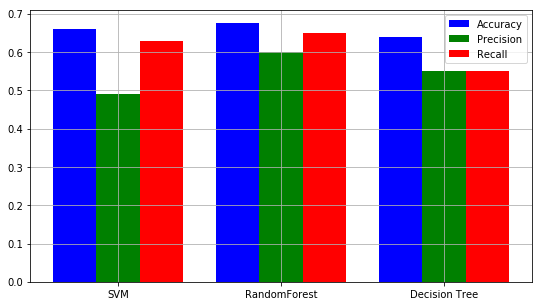

In [112]:
import matplotlib.pyplot as plt
 
name_list = ['SVM','RandomForest','Decision tree']
num_list = [0.660,0.676,0.639]
num_list1 = [0.49,0.60,0.55]
num_list2 = [0.63,0.65,0.55]

x = np.arange(3)
total_width, n = 0.8, 3
width = total_width / n
x = x - (total_width - width) / 2

plt.figure(figsize=(9,5))

plt.bar(x, num_list, width=width, label='Accuracy',fc = 'blue')

plt.bar(x+width, num_list1, width=width, label='Precision',tick_label = num_list,fc = 'green')
    
plt.bar(x+2*width, num_list2, width=width, label='Recall',tick_label = num_list1,fc = 'red')

plt.xticks( np.arange(3), ('SVM','RandomForest','Decision Tree') )

plt.legend()
plt.grid()
plt.show()
